In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1=pd.read_csv("data1.csv")
df2=pd.read_csv("data2.csv")


In [14]:
print(df1['fraudulent'].value_counts())
print(df2['fraudulent'].value_counts())

f    17014
t      866
Name: fraudulent, dtype: int64
f    866
t    866
Name: fraudulent, dtype: int64


In [15]:
df2.columns.tolist()

['Unnamed: 0',
 'title',
 'location',
 'department',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [16]:
df=df2
df.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
df

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,SEM Coordinator,"GR, I, Athens",Other,#URL_c379aa631173ed5b7c345ab3f500a9a053e509138...,The right candidate will be responsible for co...,- Previous experience of minimum 3 years in SE...,- Attractive Remuneration Package. - Work in a...,Full-time,Not specified,Not specified,Not specified,Other,f
1,Senior Data Scientist,"GB, LND, London",Engineering,"As a growing and successful startup, Conversoc...",Conversocial builds software that helps compan...,Good working knowledge of Python or similar la...,Salary of £40-55k plus stock options £2k annua...,Other,Not specified,Not specified,Not specified,Engineering,f
2,Junior Web Marketing Specialist,"GR, I, Ilion",Web Marketing και Social,Η Atnet Communications A.E. είναι μια αμιγώς ε...,Η Atnet Communications αναζητά Junior Web Mark...,Απαιτούμενα προσόντα: Hands-on εμπειρία στην δ...,H θέση αφορά μόνιμη απασχόληση στην περιοχή το...,Full-time,Entry level,Not specified,Marketing and Advertising,Marketing,f
3,New Product Development Project Leader - Full ...,"US, GA, Atlanta",Other,We Provide Full Time Permanent Positions for m...,Coordination and project management of New Pro...,"Location - Atlanta, GA, USA Job Type – Permane...",Not disclosed,Full-time,Mid-Senior level,Bachelor's Degree,Management Consulting,Management,f
4,Data Intern - Retail & Apparel Analysis,"GB, LND, London",Fashion:Internships,"We build software for fashion retailers, to he...",About EDITD EDITD’s software is the market lea...,Not specified,Not disclosed,Other,Internship,Not specified,Apparel & Fashion,Other,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",Other,No profile,Student Positions Part-Time and Full-Time.You ...,Not specified,Not disclosed,Part-time,Not specified,Not specified,Not specified,Other,t
1728,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,No profile,LEARN TO EARN AN EXECUTIVE LEVEL INCOME FULL T...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,Other,Not specified,Not specified,Not specified,Other,t
1729,Android Developer,"PL, MZ, Warsaw",Other,No profile,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,Other,Not specified,Not specified,Not specified,Other,t
1730,Payroll Clerk,"US, NY, New York",Other,No profile,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or equiv...,We offer a competitive salary and benefits pac...,Full-time,Not specified,Not specified,Apparel & Fashion,Accounting/Auditing,t


In [21]:
# Check shape of data
print(f"Dataset shape: {df.shape}")

# Check for missing values
df.isnull().sum()

Dataset shape: (1729, 13)


title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

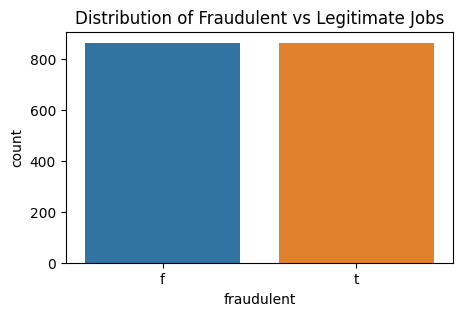

In [28]:
# Distribution of fraudulent vs legitimate jobs
plt.figure(figsize=(5,3))
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Fraudulent vs Legitimate Jobs')
plt.show()


In [40]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries

def split(location):
    l = location.split(',')
    return l[0]

df['country'] = df.location.apply(split)
df['country']

0       GR
1       GB
2       GR
3       US
4       GB
        ..
1727    US
1728    AU
1729    PL
1730    US
1731    US
Name: country, Length: 1729, dtype: object

In [43]:
#top countries posting job postings
df['country'].value_counts()[:10]


US         1235
GB          128
GR           61
AU           47
Unknown      39
CA           36
NZ           26
DE           23
IN           15
MY           12
Name: country, dtype: int64

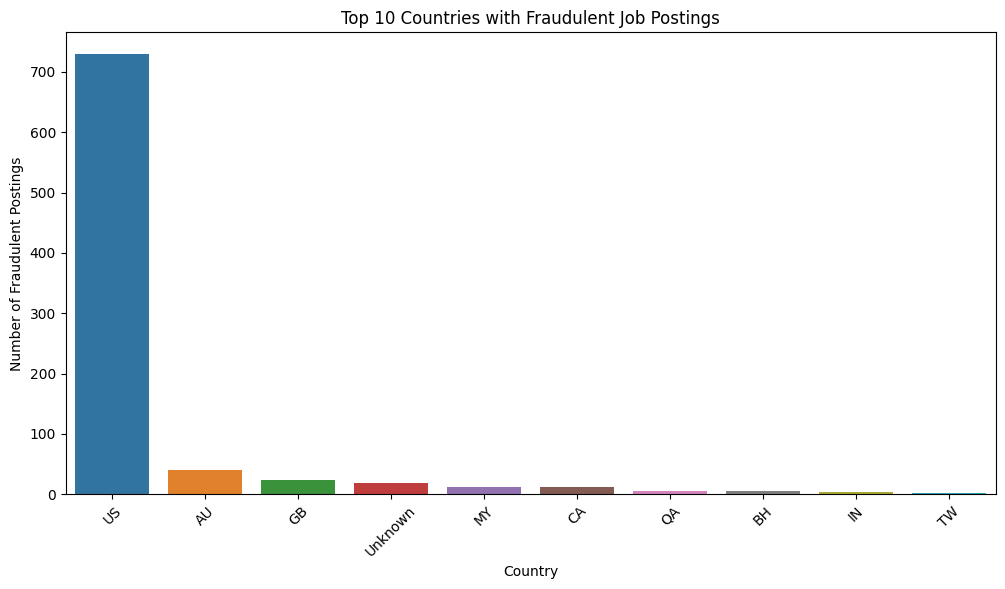

In [46]:
fraud_by_country = df[df['fraudulent']=='t']['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=fraud_by_country.index, y=fraud_by_country.values)
plt.title('Top 10 Countries with Fraudulent Job Postings')
plt.xlabel('Country')
plt.ylabel('Number of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

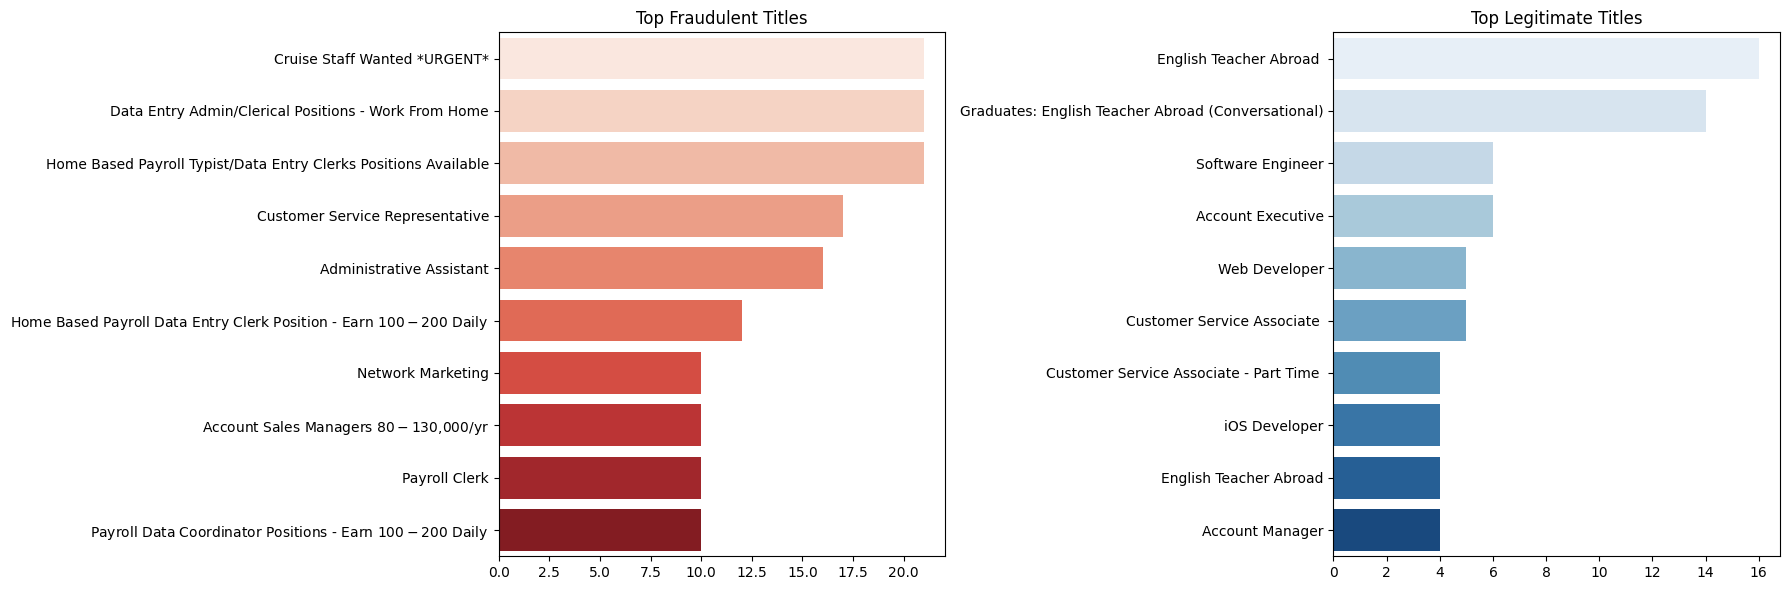

In [48]:
# Top 10 fraudulent job titles
fraud_titles = df[df['fraudulent']=='t']['title'].value_counts().head(10)


# Compare with legitimate titles
legit_titles = df[df['fraudulent']=='f']['title'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
sns.barplot(x=fraud_titles.values, y=fraud_titles.index, palette='Reds', ax=ax1)
ax1.set_title('Top Fraudulent Titles')
sns.barplot(x=legit_titles.values, y=legit_titles.index, palette='Blues', ax=ax2)
ax2.set_title('Top Legitimate Titles')
plt.tight_layout()
plt.show()

In [ ]:
# we see fraudelent postings have spammy titles, with *urgent*,and salary etc,.

<Axes: xlabel='description_length', ylabel='Count'>

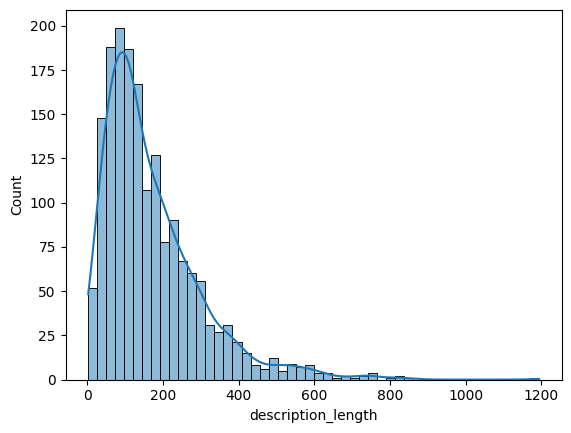

In [36]:
#description text length distribtuion
df['description_length'] = df['description'].apply(lambda x: len(x.split()))
sns.histplot(df['description_length'], kde=True)


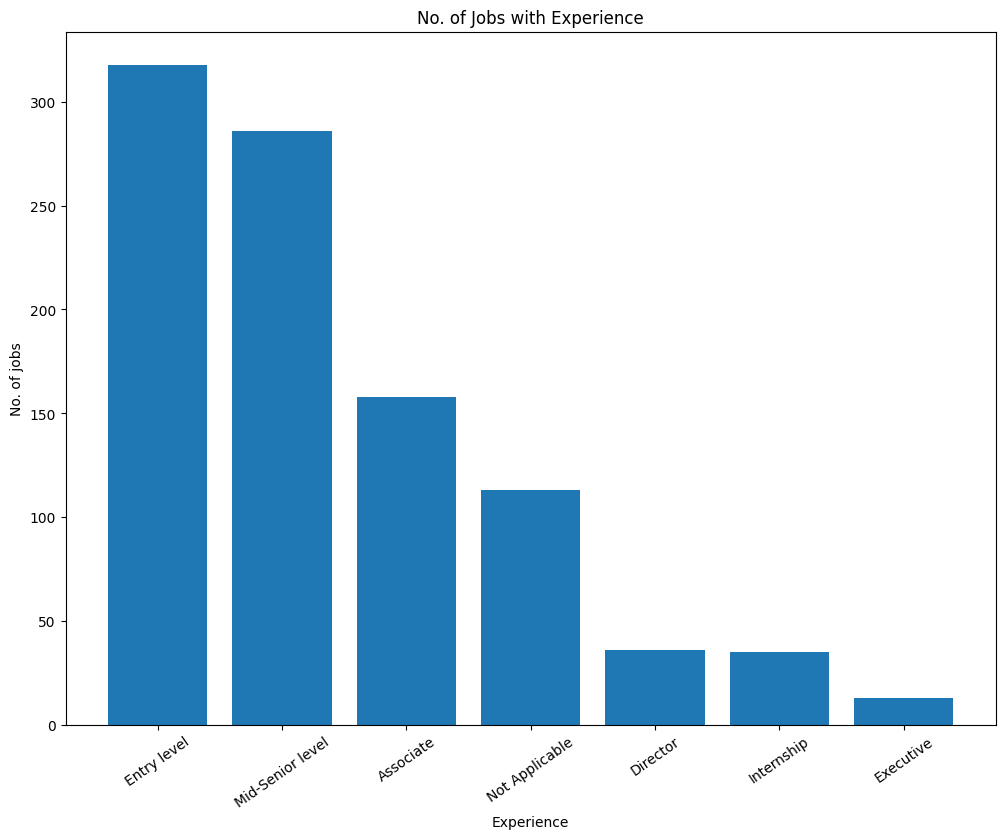

In [55]:
# visualizing jobs based on experience
experience = dict(df.required_experience.value_counts())
del experience["Not specified"]
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [57]:
# Create combined text column (for optional NLP use)
df['text'] = (
    df['title'].fillna('') + ' ' +
    df['location'].fillna('') + ' ' +
    df['company_profile'].fillna('') + ' ' +
    df['description'].fillna('') + ' ' +
    df['requirements'].fillna('') + ' ' +
    df['benefits'].fillna('') + ' ' +
    df['industry'].fillna('')
)


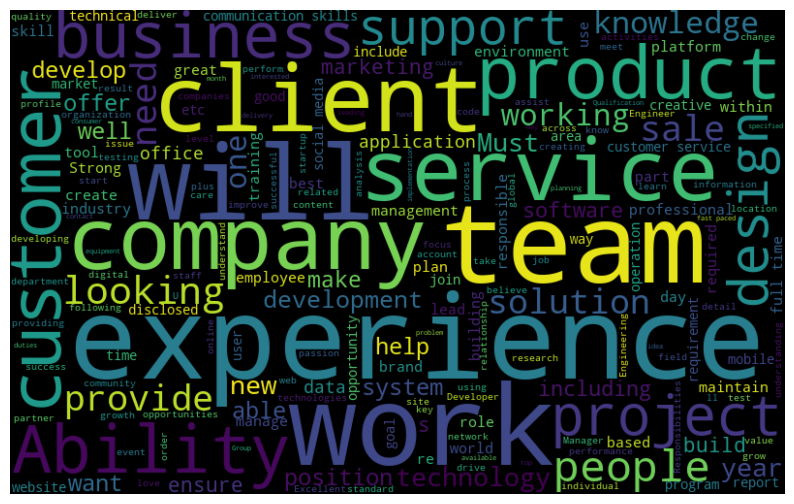

In [65]:
# Common words in real job posting texts

real_post = ''.join([text for text in df["text"][df['fraudulent']=='f']])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
     

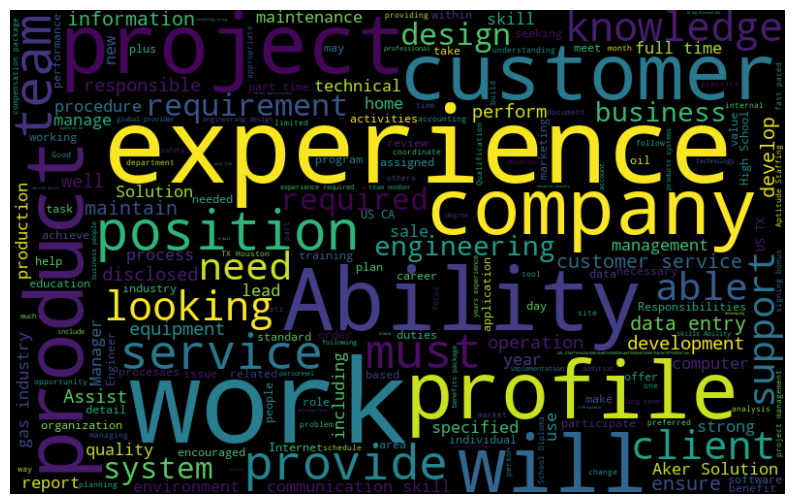

In [67]:
fraud_post = ''.join([text for text in df["text"][df['fraudulent'] == 't']])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
     